# Presentation du cas

## Importations des librairies

In [110]:
# Standard libraries
import warnings
import pickle
from math import sqrt, pi
import re
import numpy as np
import pickle
import pandas as pd
from math import pi
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

# Preprocessing / preparation
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# NLP libraries
import spacy

# Machine learning
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Model evaluation libraries
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import rand_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import adjusted_rand_score

pd.set_option("display.max_columns", None)
warnings.filterwarnings("ignore")

## Téléchargements données

In [7]:
with open("customer_full.pkl", "rb") as f:
    data = pickle.load(f)

data["writes_reviews"] = data["writes_reviews"].astype(int)
data["writes_titles"] = data["writes_titles"].astype(int)
data = pd.concat([data, pd.get_dummies(data["preferred_product_category"])], axis=1)
data.drop(["preferred_product_category"], axis=1, inplace=True)
data = pd.concat([data, pd.get_dummies(data["preferred_payment_method"])], axis=1)
data.drop(["preferred_payment_method"], axis=1, inplace=True)
# data=pd.concat([data,pd.get_dummies(data["customer_state"])],axis=1)
data.drop(["customer_state"], axis=1, inplace=True)
data.drop(["customer_id"], axis=1, inplace=True)
knn = KNNImputer()
data = pd.DataFrame(knn.fit_transform(data), columns=data.columns)


<AxesSubplot:>

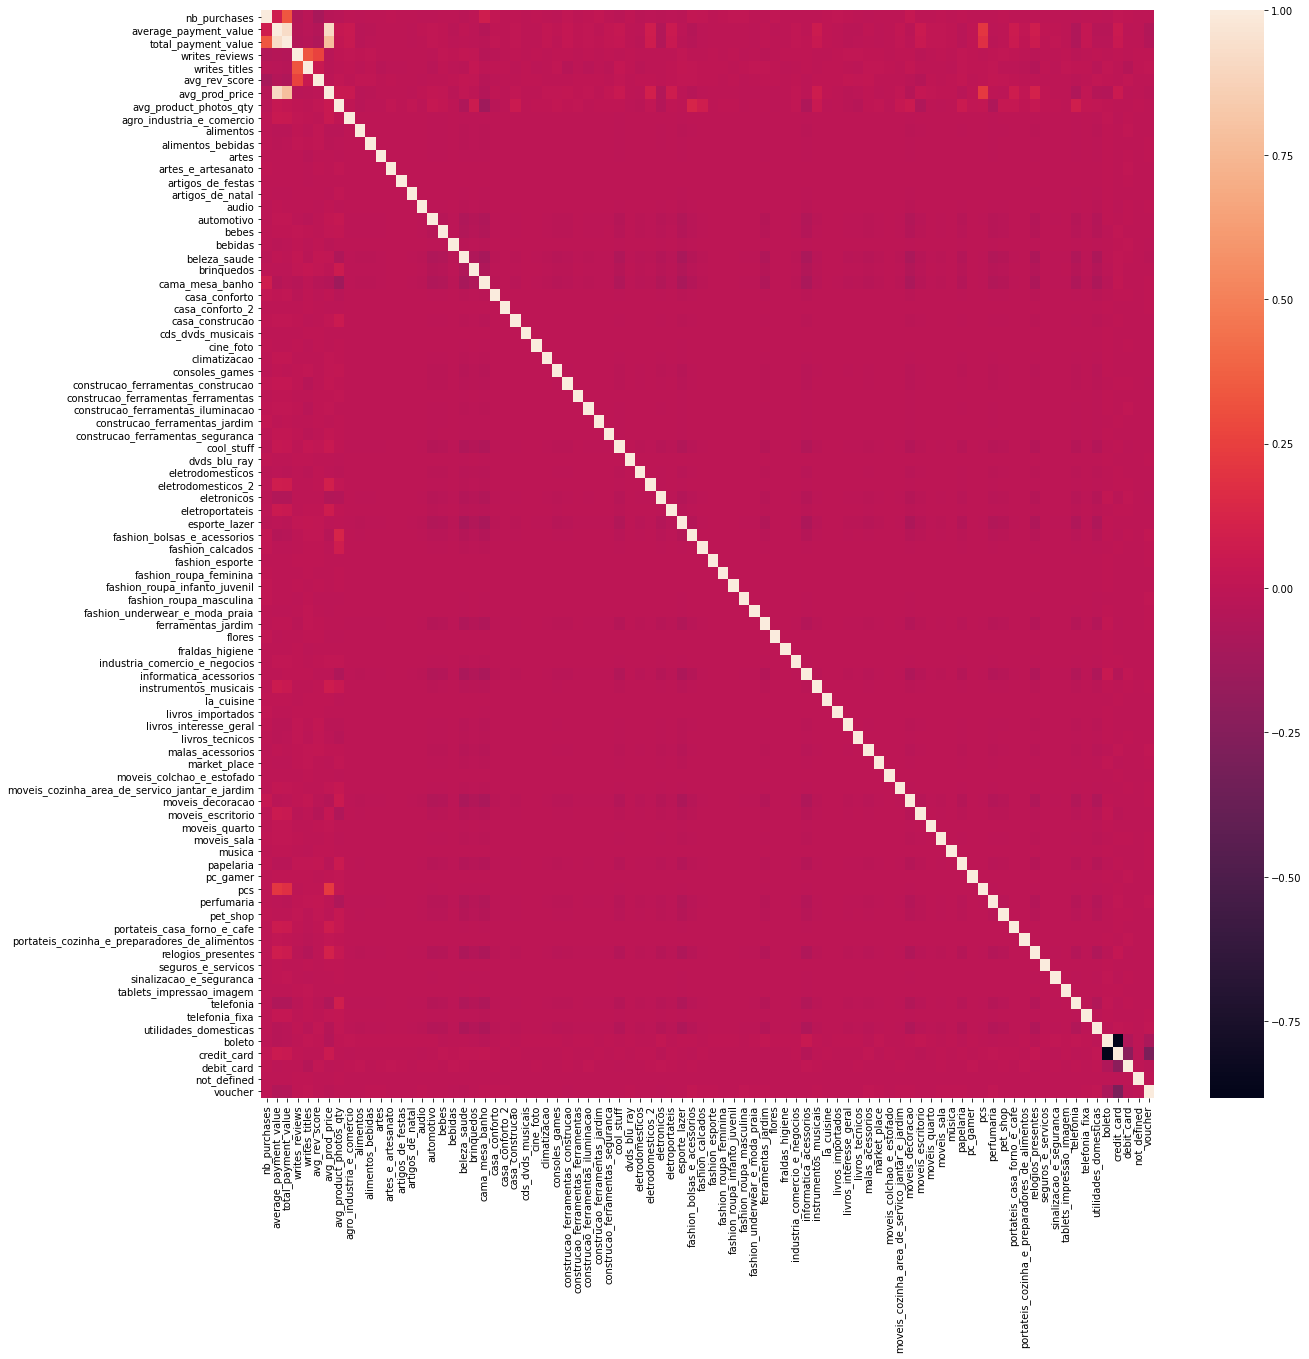

In [20]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(data.corr())

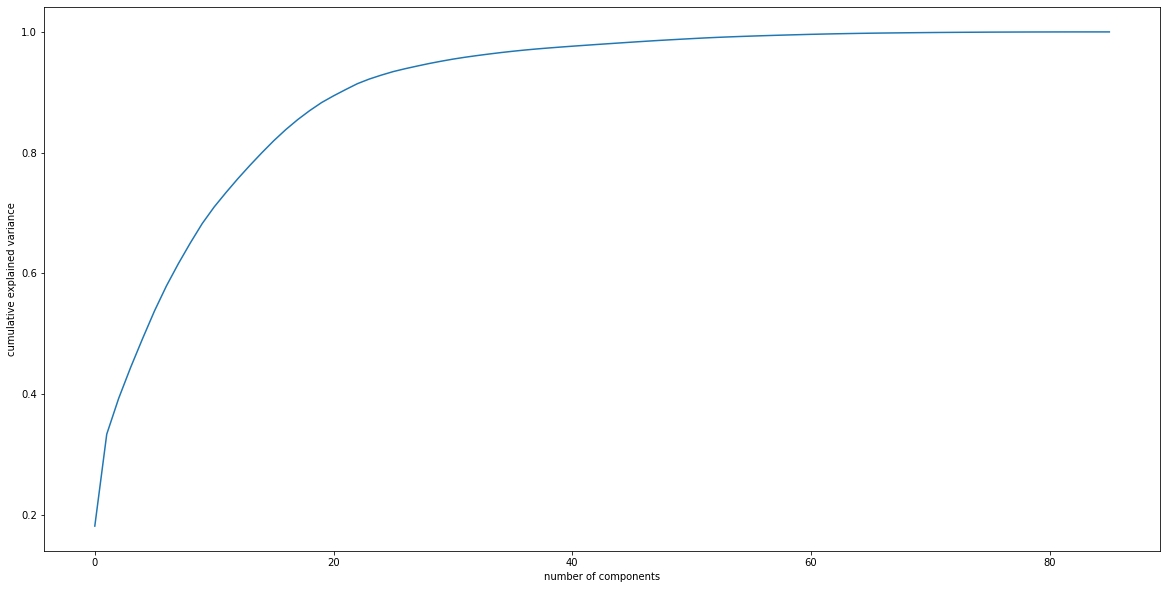

In [21]:
mm = MinMaxScaler()
data = pd.DataFrame(mm.fit_transform(data), columns=data.columns)
pca = PCA().fit(data)
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance")

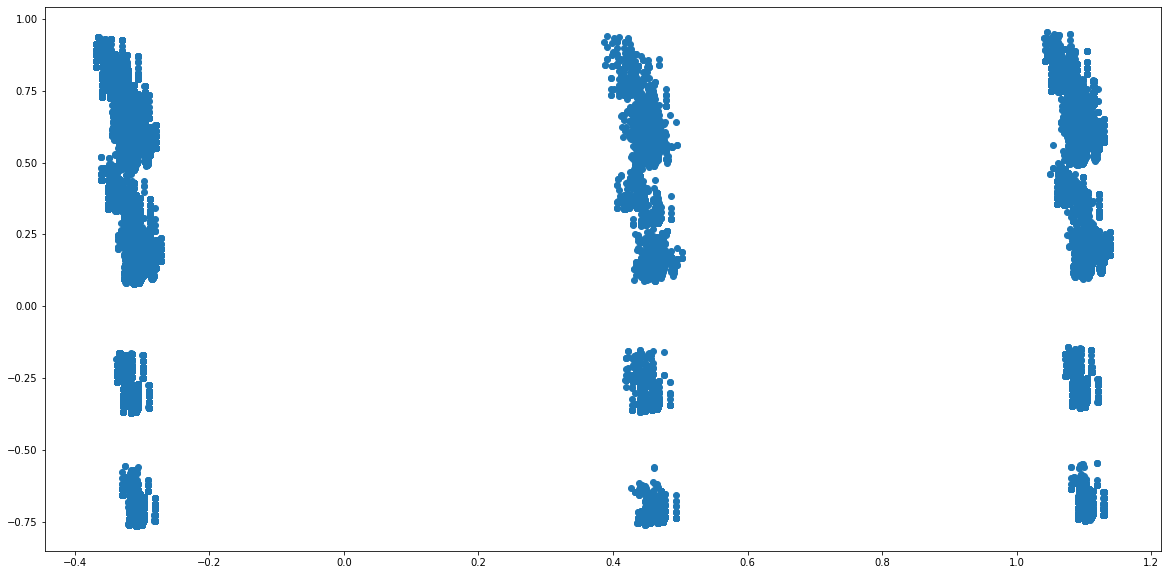

In [18]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.scatter(projected["x"], projected["y"])

In [51]:
range_n_clusters = range(5, 10, 1)

perf = []
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 column
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data)
    data["labels"] = cluster_labels
    temp = davies_bouldin_score(data, cluster_labels)
    perf.append([n_clusters, temp])
    print("davies_bouldin_score is: ", temp)


davies_bouldin_score is:  0.7571319934746561
davies_bouldin_score is:  0.7745750110732986
davies_bouldin_score is:  0.7925530847042731
davies_bouldin_score is:  0.7713823677100898
davies_bouldin_score is:  0.7848435050474705


In [60]:
perf = pd.DataFrame(perf)
perf[perf.iloc[:, 1] == perf.iloc[:, 1].min()][0]
min_cluster = int(perf[perf.iloc[:, 1] == perf.iloc[:, 1].min()][0])

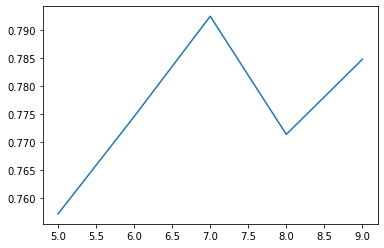

In [54]:
plt.plot(perf.iloc[:, 0], perf.iloc[:, 1])

In [63]:
clusterer = KMeans(n_clusters=min_cluster, random_state=10)
cluster_labels = clusterer.fit_predict(data)
data["labels"] = cluster_labels
data.groupby(["labels"]).describe(percentiles=[0])

nb_purchases                                          \
              count      mean       std  min   0%  50%  max   
labels                                                        
0           73378.0  1.014064  0.121179  1.0  1.0  1.0  4.0   
1           21262.0  1.091807  0.334070  1.0  1.0  1.0  6.0   
2              88.0  1.488636  1.381273  1.0  1.0  1.0  8.0   
3             844.0  1.139810  0.586020  1.0  1.0  1.0  7.0   
4            3869.0  1.158697  0.500403  1.0  1.0  1.0  7.0   

       average_payment_value                                            \
                       count         mean          std     min      0%   
labels                                                                   
0                    73378.0    84.251168    41.315496    0.00    0.00   
1                    21262.0   254.439017    76.792521    4.24    4.24   
2                       88.0  3336.067841  1632.180437  853.95  853.95   
3                      844.0  1521.899206   393.842407  135.44  135.44   
4                     3869.0   665.466332   180.949503  100.00  100.00   

                           total_payment_value                            \
             50%       max               count         mean          std   
labels                                                                     
0         77.570    213.90             73378.0    85.508160    43.259029   
1        230.805    597.44             21262.0   273.953024   100.065194   
2       3032.905  13664.08                88.0  4130.890227  2271.812502   
3       1417.905   3018.60               844.0  1656.889834   540.535108   
4        627.750   1482.24              3869.0   738.316836   241.139124   

                                             writes_reviews            \
            min       0%       50%       max          count      mean   
labels                                                                  
0          0.00     0.00    77.890    314.97        73378.0  0.599798   
1          4.24     4.24   241.730   1016.40        21262.0  0.561941   
2       2564.65  2564.65  3184.445  15978.65           88.0  0.488636   
3        135.44   135.44  1479.510   4491.44          844.0  0.514218   
4        100.00   100.00   678.360   2335.28         3869.0  0.514603   

                                     writes_titles                           \
             std  min   0%  50%  max         count      mean       std  min   
labels                                                                        
0       0.489942  0.0  0.0  1.0  1.0       73378.0  0.887868  0.315531  0.0   
1       0.496160  0.0  0.0  1.0  1.0       21262.0  0.875082  0.330633  0.0   
2       0.502735  0.0  0.0  0.0  1.0          88.0  0.795455  0.405681  0.0   
3       0.500094  0.0  0.0  1.0  1.0         844.0  0.840047  0.366779  0.0   
4       0.499851  0.0  0.0  1.0  1.0        3869.0  0.853192  0.353960  0.0   

                      avg_rev_score                                          \
         0%  50%  max         count      mean       std  min   0%  50%  max   
labels                                                                        
0       0.0  1.0  1.0       73378.0  4.131020  1.301935  1.0  1.0  5.0  5.0   
1       0.0  1.0  1.0       21262.0  4.003885  1.411960  1.0  1.0  5.0  5.0   
2       0.0  1.0  1.0          88.0  3.738636  1.611555  1.0  1.0  4.9  5.0   
3       0.0  1.0  1.0         844.0  3.879147  1.530827  1.0  1.0  5.0  5.0   
4       0.0  1.0  1.0        3869.0  3.872318  1.516238  1.0  1.0  5.0  5.0   

       avg_prod_price                                                  \
                count         mean          std        min         0%   
labels                                                                  
0             73378.0    65.513582    38.226792   0.850000   0.850000   
1             21262.0   202.990174    86.440170   3.400000   3.400000   
2                88.0  2610.507307  1380.616079  65.415000  65.415000   
3          

In [43]:
def data_prep(data):
    data["writes_reviews"] = data["writes_reviews"].astype(int)
    data["writes_titles"] = data["writes_titles"].astype(int)
    # data=pd.concat([data,pd.get_dummies(data["preferred_product_category"])],axis=1)
    data.drop(["preferred_product_category"], axis=1, inplace=True)
    # data=pd.concat([data,pd.get_dummies(data["preferred_payment_method"])],axis=1)
    data.drop(["preferred_payment_method"], axis=1, inplace=True)
    # data=pd.concat([data,pd.get_dummies(data["customer_state"])],axis=1)
    data.drop(["customer_state"], axis=1, inplace=True)
    data.drop(["customer_id"], axis=1, inplace=True)
    knn = KNNImputer()
    data = pd.DataFrame(knn.fit_transform(data), columns=data.columns)
    return data

## Stabilité sur des périodes de 6 mois

In [47]:
with open("customer_subsets.pkl", "rb") as f:
    subset_list = pickle.load(f)

In [48]:
for i in range(0, len(subset_list)):
    subset_list[i] = data_prep(subset_list[i])
    print(subset_list[i].shape)

(329, 8)
(14516, 8)
(30416, 8)
(41063, 8)
(12824, 8)


In [49]:
subset_list[1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14516 entries, 0 to 14515
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   nb_purchases            14516 non-null  float64
 1   average_payment_value   14516 non-null  float64
 2   total_payment_value     14516 non-null  float64
 3   writes_reviews          14516 non-null  float64
 4   writes_titles           14516 non-null  float64
 5   avg_rev_score           14516 non-null  float64
 6   avg_prod_price          14516 non-null  float64
 7   avg_product_photos_qty  14516 non-null  float64
dtypes: float64(8)
memory usage: 907.4 KB


In [103]:
min_clusters = []
for j in range(0, 50):
    list_list_labels = []
    dbs_scores = []
    ari_scores = []
    for i in range(0, len(subset_list)):
        data = subset_list[i]
        range_n_clusters = range(3, 8, 1)
        if i == 0:
            perf = []
            for n_clusters in range_n_clusters:

                # Create a subplot with 1 row and 2 column
                clusterer = KMeans(n_clusters=n_clusters)
                cluster_labels = clusterer.fit_predict(data)
                temp = davies_bouldin_score(data, cluster_labels)
                perf.append([n_clusters, temp])

            perf = pd.DataFrame(perf)
            min_cluster = int(perf[perf.iloc[:, 1] == perf.iloc[:, 1].min()][0])
            min_clusters.append(min_cluster)
            clusterer = KMeans(n_clusters=min_cluster, random_state=10)
            cluster_labels = clusterer.fit_predict(data)
            temp = davies_bouldin_score(data, cluster_labels)
            list_list_labels.append(cluster_labels)
            # print("Min cluster: " + str(min_cluster))
            # print("DBS: " + str(temp))
            dbs_scores.append(temp)
            ari_scores.append(1)

        else:
            # new dataset clustering
            clusterer = KMeans(n_clusters=min_cluster)
            # print(data.columns)
            cluster_labels = clusterer.fit_predict(data)
            temp = davies_bouldin_score(data, cluster_labels)
            dbs_scores.append(temp)
            # print("DBS : " + str(temp))
            list_list_labels.append(cluster_labels)
            # previous dataset clustering with new clustering algorithm
            # print(subset_list[i-1].info())
            # print(subset_list[i-1].shape)
            # print(len(list_list_labels[i-1]))
            temp = clusterer.predict(subset_list[i - 1])
            score = adjusted_rand_score(list_list_labels[i - 1], temp)
            ari_scores.append(score)
            # print("AR score:" + str(score))
        if j == 0:
            dbs = pd.DataFrame([dbs_scores])
            ari = pd.DataFrame([ari_scores])
        else:
            dbs = pd.concat([dbs, pd.DataFrame([dbs_scores])])
            ari = pd.concat([ari, pd.DataFrame([ari_scores])])


In [107]:
np.mean(min_clusters)

5.9

La meilleure segmentation moyenne comprend pres de 6 segments différents.

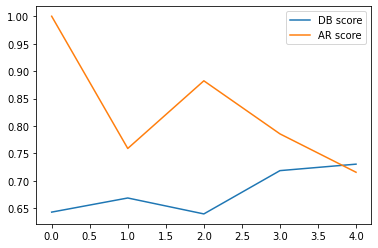

In [105]:
plt.plot(dbs.mean(), label="DB score")
plt.plot(ari.mean(), label="AR score")
plt.legend()

In [108]:
for j in range(0, 50):
    list_list_labels = []
    dbs_scores = []
    ari_scores = []
    for i in range(0, len(subset_list)):
        data = subset_list[i]
        range_n_clusters = range(3, 8, 1)
        if i == 0:
            clusterer = KMeans(n_clusters=6, random_state=10)
            cluster_labels = clusterer.fit_predict(data)
            temp = davies_bouldin_score(data, cluster_labels)
            list_list_labels.append(cluster_labels)
            dbs_scores.append(temp)
            ari_scores.append(1)

        else:
            clusterer = KMeans(n_clusters=6)
            cluster_labels = clusterer.fit_predict(data)
            temp = davies_bouldin_score(data, cluster_labels)
            dbs_scores.append(temp)
            list_list_labels.append(cluster_labels)
            temp = clusterer.predict(subset_list[i - 1])
            score = adjusted_rand_score(list_list_labels[i - 1], temp)
            ari_scores.append(score)
        if j == 0:
            dbs = pd.DataFrame([dbs_scores])
            ari = pd.DataFrame([ari_scores])
        else:
            dbs = pd.concat([dbs, pd.DataFrame([dbs_scores])])
            ari = pd.concat([ari, pd.DataFrame([ari_scores])])

    clear_output(wait=True)
    print(j)

plt.plot(dbs.mean(), label="DB score")
plt.plot(ari.mean(), label="AR score")
plt.legend()


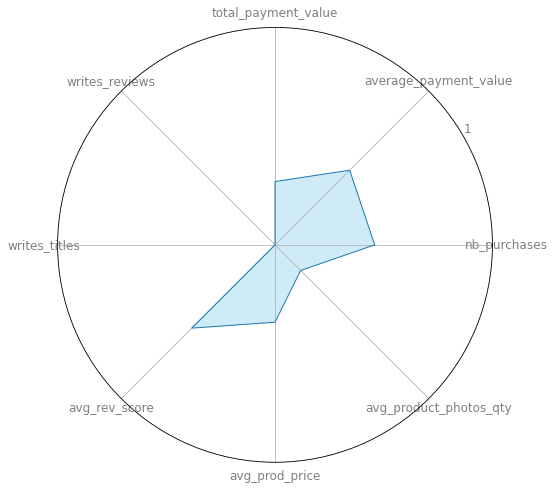

In [130]:
temp = subset_list[0]
temp["labels"] = list_list_labels[0]
temp = temp[temp["labels"] == 5]
temp.drop(["labels"], axis=1, inplace=True)

categories = temp.columns
mm = MinMaxScaler()
temp = pd.DataFrame(mm.fit_transform(temp), columns=temp.columns)
values = temp.mean().values.flatten().tolist()
values += values[:1]  # repeat the first value to close the circular graph
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8), subplot_kw=dict(polar=True))

plt.xticks(angles[:-1], categories, color="grey", size=12)
plt.yticks(np.arange(1, 6), ["1", "2", "3", "4", "5"], color="grey", size=12)
plt.ylim(0, 1)
ax.set_rlabel_position(30)

ax.plot(angles, values, linewidth=1, linestyle="solid")
ax.fill(angles, values, "skyblue", alpha=0.4)

plt.show()

In [137]:
temp = subset_list[0]
temp["labels"] = list_list_labels[0]
temp = temp[temp["labels"] == 4]
temp.drop(["labels"], axis=1, inplace=True)
temp.mean()

nb_purchases               1.000000
average_payment_value     60.173649
total_payment_value       60.112338
writes_reviews             0.311688
writes_titles              1.000000
avg_rev_score              3.767532
avg_prod_price            47.091753
avg_product_photos_qty     2.524675
dtype: float64

## Stabilité sur des périodes de 12 mois

In [139]:
datasets = []
datasets.append(pd.concat([subset_list[1], subset_list[2]]))
datasets.append(pd.concat([subset_list[3], subset_list[4]]))
min_clusters = []
for j in range(0, 50):
    list_list_labels = []
    dbs_scores = []
    ari_scores = []
    for i in range(0, len(datasets)):
        data = datasets[i]
        range_n_clusters = range(3, 8, 1)
        if i == 0:
            perf = []
            for n_clusters in range_n_clusters:

                # Create a subplot with 1 row and 2 column
                clusterer = KMeans(n_clusters=n_clusters)
                cluster_labels = clusterer.fit_predict(data)
                temp = davies_bouldin_score(data, cluster_labels)
                perf.append([n_clusters, temp])

            perf = pd.DataFrame(perf)
            min_cluster = int(perf[perf.iloc[:, 1] == perf.iloc[:, 1].min()][0])
            min_clusters.append(min_cluster)
            clusterer = KMeans(n_clusters=min_cluster, random_state=10)
            cluster_labels = clusterer.fit_predict(data)
            temp = davies_bouldin_score(data, cluster_labels)
            list_list_labels.append(cluster_labels)
            dbs_scores.append(temp)
            ari_scores.append(1)

        else:
            # new dataset clustering
            clusterer = KMeans(n_clusters=min_cluster)
            # print(data.columns)
            cluster_labels = clusterer.fit_predict(data)
            temp = davies_bouldin_score(data, cluster_labels)
            dbs_scores.append(temp)
            # print("DBS : " + str(temp))
            list_list_labels.append(cluster_labels)
            # previous dataset clustering with new clustering algorithm
            temp = clusterer.predict(datasets[i - 1])
            score = adjusted_rand_score(list_list_labels[i - 1], temp)
            ari_scores.append(score)
        if j == 0:
            dbs = pd.DataFrame([dbs_scores])
            ari = pd.DataFrame([ari_scores])
        else:
            dbs = pd.concat([dbs, pd.DataFrame([dbs_scores])])
            ari = pd.concat([ari, pd.DataFrame([ari_scores])])

    clear_output(wait=True)
    print(j)

In [142]:
np.mean(min_clusters)

3.2

49


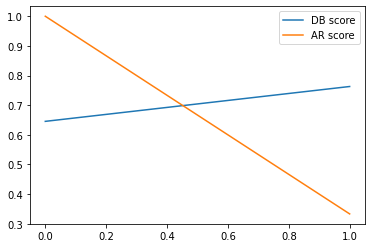

In [145]:
for j in range(0, 50):
    list_list_labels = []
    dbs_scores = []
    ari_scores = []
    for i in range(0, len(datasets)):
        data = datasets[i]
        range_n_clusters = range(3, 8, 1)
        if i == 0:
            clusterer = KMeans(n_clusters=3, random_state=10)
            cluster_labels = clusterer.fit_predict(data)
            temp = davies_bouldin_score(data, cluster_labels)
            list_list_labels.append(cluster_labels)
            dbs_scores.append(temp)
            ari_scores.append(1)

        else:
            clusterer = KMeans(n_clusters=6)
            cluster_labels = clusterer.fit_predict(data)
            temp = davies_bouldin_score(data, cluster_labels)
            dbs_scores.append(temp)
            list_list_labels.append(cluster_labels)
            temp = clusterer.predict(datasets[i - 1])
            score = adjusted_rand_score(list_list_labels[i - 1], temp)
            ari_scores.append(score)
        if j == 0:
            dbs = pd.DataFrame([dbs_scores])
            ari = pd.DataFrame([ari_scores])
        else:
            dbs = pd.concat([dbs, pd.DataFrame([dbs_scores])])
            ari = pd.concat([ari, pd.DataFrame([ari_scores])])

    clear_output(wait=True)
    print(j)

plt.plot(dbs.mean(), label="DB score")
plt.plot(ari.mean(), label="AR score")
plt.legend()
